In [147]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom
# import intertools

In [128]:
def binomial(n, k, p =0.5):
    return math.comb(n, k)*p**k *(1-p)**(n-k)

In [30]:
# Constants (adjust based on your C code)
SYS_N = 3488  # Example, must match your C code
BYTES_PER_V = SYS_N # Each v is SYS_N bits = SYS_N/8 bytes

# Read binary file
with open("same_sample.bin", "rb") as f:
    data = f.read()
# Convert to numpy array (each row is a 'v' vector)
num_vectors = len(data) // BYTES_PER_V
same_sample = np.frombuffer(data, dtype=np.uint8).reshape((num_vectors, BYTES_PER_V))

# Read binary file
with open("same_instance.bin", "rb") as f:
    data = f.read()
# Convert to numpy array (each row is a 'v' vector)
num_vectors = len(data) // BYTES_PER_V
same_instance = np.frombuffer(data, dtype=np.uint8).reshape((num_vectors, BYTES_PER_V))

# Read binary file
with open("diff_sample.bin", "rb") as f:
    data = f.read()
# Convert to numpy array (each row is a 'v' vector)
num_vectors = len(data) // BYTES_PER_V
diff_sample = np.frombuffer(data, dtype=np.uint8).reshape((num_vectors, BYTES_PER_V))

In [31]:
print(len(same_sample), len(same_instance))


1250 1250


In [32]:
list_combinatiosn = []
while len(list_combinatiosn) < 10000:
    indices = sorted(random.sample(range(len(same_sample)), 2))
    if indices not in list_combinatiosn:
        list_combinatiosn.append(indices)
    print(len(list_combinatiosn), end = '\r')

In [ ]:
print(np.bitw(np.unpackbits(same_sample[10])))

[1 1 1 ... 0 1 0]


In [68]:
np.bitwise_xor(0, 1)

np.int64(1)

In [119]:
hamming_distances_same_sample = []
hamming_distances_diff_sample = []
hamming_distances_same_instance = []

for i,j in list_combinatiosn:
    xor_result = np.bitwise_xor(same_sample[i], same_sample[j])
    hamming_distances_same_sample.append(np.unpackbits(xor_result).sum())
    xor_result = np.bitwise_xor(diff_sample[i], diff_sample[j])
    hamming_distances_diff_sample.append(np.unpackbits(xor_result).sum())
    xor_result = np.bitwise_xor(same_instance[i], same_instance[j])
    hamming_distances_same_instance.append(np.unpackbits(xor_result).sum())

In [110]:
SYS_N*8

27904

In [192]:
bins = np.arange(13500, 14501, 20)
H1, centers1 = np.histogram(hamming_distances_same_sample, density = True, bins = bins)
centers1 = (centers1[1:]+centers1[:-1])/2
H2, centers2 = np.histogram(hamming_distances_same_instance, bins = bins, density = True)
centers2 = (centers2[1:]+centers2[:-1])/2
H3, centers3 = np.histogram(hamming_distances_diff_sample, bins = bins, density = True)
centers3 = (centers3[1:]+centers3[:-1])/2
H4 = binom.pmf(centers2, SYS_N*8, 0.5)

In [191]:
print(SYS_N*8)

27904


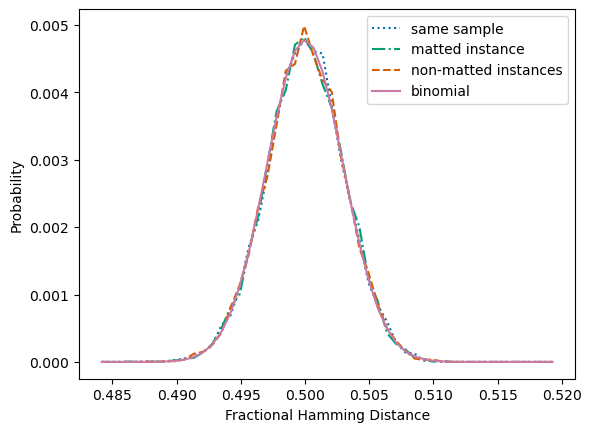

In [196]:
plt.plot(centers1/SYS_N/8, H1*1, label="same sample", linestyle="dotted", color="#0072B2")  # Blue
plt.plot(centers2/SYS_N/8, H2*1, label="matted instance", linestyle="-.", color="#009E73")  # Green
plt.plot(centers3/SYS_N/8, H3, label="non-matted instances", linestyle="--", color="#D55E00")  # Orange
plt.plot(centers2/SYS_N/8, binom.pmf(centers2, 27904, 0.5), label="binomial", color="#CC79A7")  # Purple
plt.ylabel("Probability")
plt.xlabel("Fractional Hamming Distance")
plt.legend()
plt.savefig("revocability_unlinkability.pdf", bbox_inches='tight')


In [188]:
len(H1)

50

In [194]:
chi2_1 = np.sum( ((H1-binom.pmf(centers2, 27904, 0.5))[binom.pmf(centers2, 27904, 0.5)>0]**2/binom.pmf(centers2, 27904, 0.5)[binom.pmf(centers2, 27904, 0.5)>0]))
chi2_2 = np.sum( ((H2-binom.pmf(centers2, 27904, 0.5))[binom.pmf(centers2, 27904, 0.5)>0]**2/binom.pmf(centers2, 27904, 0.5)[binom.pmf(centers2, 27904, 0.5)>0]))
chi2_3 = np.sum( ((H3-binom.pmf(centers2, 27904, 0.5))[binom.pmf(centers2, 27904, 0.5)>0]**2/binom.pmf(centers2, 27904, 0.5)[binom.pmf(centers2, 27904, 0.5)>0]))

print("d.o.f.", np.sum(binom.pmf(centers2, 27904, 0.5)>0), "chi2", chi2_1, chi2_2, chi2_3)


d.o.f. 50 chi2 0.0002486568322466203 0.00033633729950699866 0.0001871747238994376


In [ ]:
# Calculate chi2 values for curve 1 (H1) compared to H2 and H3
chi2_1_vs_2 = np.sum(((H1 - H2)[H2 > 0] ** 2) / H2[H2 > 0])
chi2_1_vs_3 = np.sum(((H1 - H3)[H3 > 0] ** 2) / H3[H3 > 0])
chi2_1_vs_2 = np.sum(((H1 - H2)[H2 > 0] ** 2) / H2[H2 > 0])
chi2_1_vs_3 = np.sum(((H1 - H3)[H3 > 0] ** 2) / H3[H3 > 0])
print("chi2 (curve 1 vs 2):", chi2_1_vs_2)
print("chi2 (curve 1 vs 3):", chi2_1_vs_3)

chi2 (curve 1 vs 2): 0.0001785037009829555
chi2 (curve 1 vs 3): 0.00039969826053692004
